# Abalone (Classification)
## Data Cleaning, Exploration and Wrangling

### Source
- http://archive.ics.uci.edu/ml/datasets/Abalone
- 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from eda import plot_corr_mat

In [50]:
df = pd.read_csv('lake/abalone/abalone.csv')
print(df.shape)

(4177, 9)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [52]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

### Reverse Transforamation.

In [53]:
#"the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200)." Check Source
continuous_cols = num_cols[:-1]
df[continuous_cols] = df[continuous_cols] * 200
df.head()

sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M    91.0      73.0    19.0         102.8            44.9            20.2   
1   M    70.0      53.0    18.0          45.1            19.9             9.7   
2   F   106.0      84.0    27.0         135.4            51.3            28.3   
3   M    88.0      73.0    25.0         103.2            43.1            22.8   
4   I    66.0      51.0    16.0          41.0            17.9             7.9   

   shell_weight  rings  
0          30.0     15  
1          14.0      7  
2          42.0      9  
3          31.0     10  
4          11.0      7

### Types of Features 

In [54]:
# Numerical
num_cols = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
            'viscera_weight', 'shell_weight', 'rings']
df[num_cols].describe()

length     diameter       height  whole_weight  shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean    104.798420    81.576251    27.903280    165.748432       71.873498   
std      24.018583    19.847973     8.365411     98.077804       44.392590   
min      15.000000    11.000000     0.000000      0.400000        0.200000   
25%      90.000000    70.000000    23.000000     88.300000       37.200000   
50%     109.000000    85.000000    28.000000    159.900000       67.200000   
75%     123.000000    96.000000    33.000000    230.600000      100.400000   
max     163.000000   130.000000   226.000000    565.100000      297.600000   

       viscera_weight  shell_weight        rings  
count     4177.000000   4177.000000  4177.000000  
mean        36.118722     47.766172     9.933684  
std         21.922850     27.840534     3.224169  
min          0.100000      0.300000     1.000000  
25%         18.700000     26.000000     8.000000  
50%         34.200000     46.800000     9.000000  
75%         50.600000     65.800000    11.000000  
max        152.000000    201.000000    29.000000

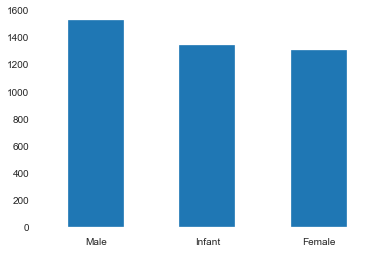

In [55]:
# Categorical
sex_categories_map = {'M': 'Male', 'F': 'Female', 'I': 'Infant'}
df.sex.map(sex_categories_map).value_counts().plot.bar(rot=0);

In [56]:
print("{} Variables are categorical and {} are categorical".format(len(num_cols), len(df.columns) - len(num_cols)))

8 Variables are categorical and 1 are categorical


### Missing Values

In [57]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

No missing values.

### Duplicated Values

In [58]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [sex, length, diameter, height, whole_weight, shucked_weight, viscera_weight, shell_weight, rings]
Index: []

No duplicated values.

### Feature Exploration

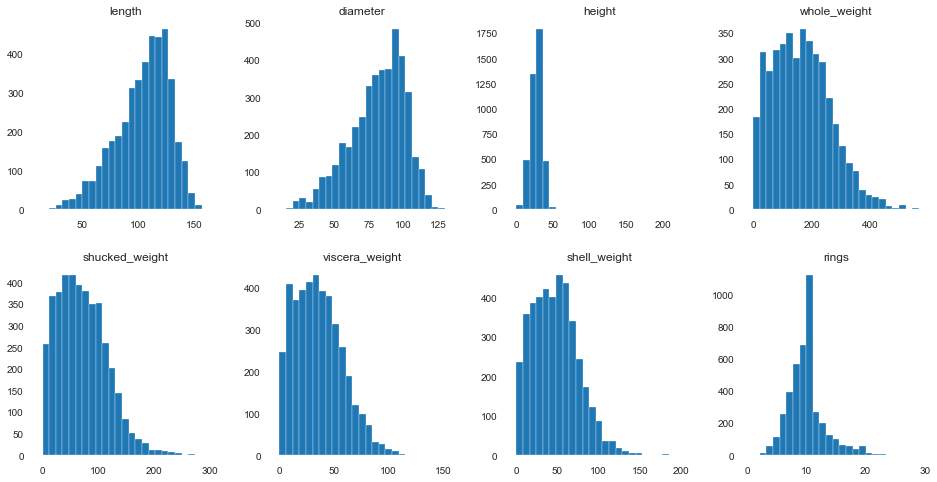

In [59]:
df.hist(figsize=(16,8), grid=False, layout=(2, 4), bins = 25);

In [60]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


### Correlation Analysis

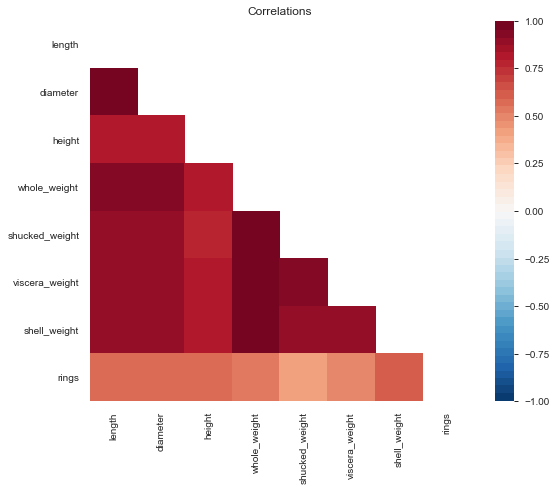

In [61]:
plot_corr_mat(df)

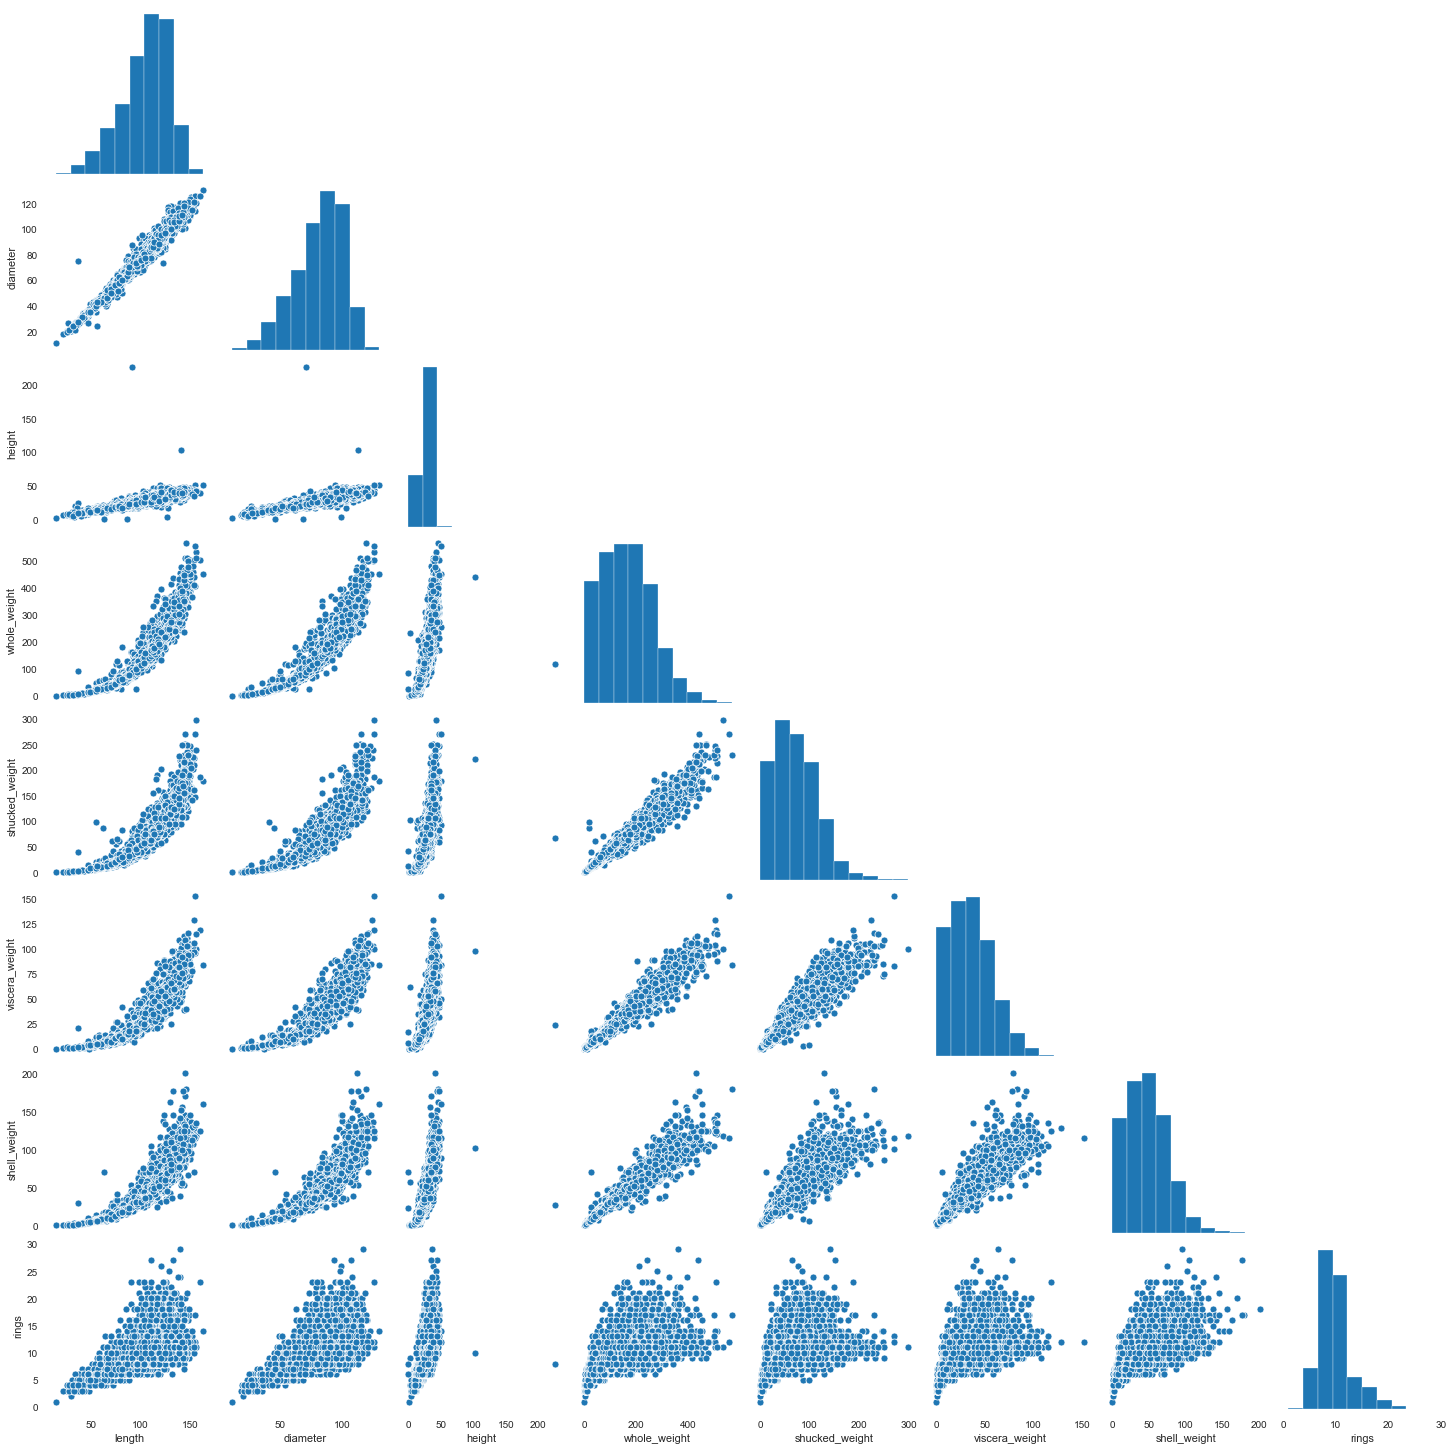

In [63]:
sns.pairplot(df, corner=True);

## Building Models

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.options.display.float_format = "{:,.6f}".format

In [ ]:
features = []
X = df_wt[features]
y = df_wt.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
print(X_train.shape, X_test.shape)
print(y_test.shape, y_test.shape)

In [ ]:
# Raw Features
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
pd.DataFrame({'Actuals': y_test, 'Predictions': y_pred})

In [ ]:
linreg.coef_

In [ ]:
def coeficient_importance(linear_model, columns, excluded_cols=[]):
    coeficients = pd.DataFrame([linear_model.coef_], columns=columns)
    all_other_columns = [col for col in columns if col not in excluded_cols]
    fig, ax = plt.subplots(figsize=(9,9))
    coeficients[all_other_columns].plot.bar(ax=ax)
    
coeficient_importance(linreg, features, ['density'])

In [ ]:
def evaluate(y_test, y_pred):
    print('(MAE) Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
    print('(MSE) Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('(R2) Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
    
    a = np.concatenate((y_test.values.reshape(-1,1), y_pred.reshape(-1,1)), axis=1)
    a = a[a[:,0].argsort()]

    fig, ax = plt.subplots(figsize=(15,5))
    x_ticks = range(y_test.shape[0])
    ax.scatter(x_ticks, a[:,0], label='Actual', c='turquoise')
    ax.scatter(x_ticks, a[:,1], label='Predictions', s=15, c='orange');
    ax.legend()
evaluate(y_test, y_pred)

In [ ]:
# SVR
from sklearn.preprocessing import StandardScaler
xscaler = StandardScaler(); x_test_scaler = StandardScaler()
yscaler = StandardScaler(); y_test_scaler = StandardScaler()
X_train_sc = xscaler.fit_transform(X_train)
y_train_sc = yscaler.fit_transform(y_train.values.reshape(-1,1))
X_test_sc = x_test_scaler.fit_transform(X_test)
y_test_sc = y_test_scaler.fit_transform(y_test.values.reshape(-1,1))

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_sc, y_train_sc.ravel())

In [ ]:
y_pred_sc = svr.predict(X_test_sc)
y_pred = y_test_scaler.inverse_transform(y_pred_sc)
pd.DataFrame({'Actuals': y_test, 'Predictions': y_pred})

In [ ]:
evaluate(y_test, y_pred)